<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_Class_14_ajuste_Antoine_DifferentialEvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution

In [ ]:
def Minimo(x):
  A = x[0]
  B = x[1]
  C = x[2]
  P = [1,5,10,20,40,60,100,200,400,760]
  T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
  Num =10 # Num = len(P)
  Soma = 0

  for i in range(Num):
    TC = T[i]
    Pcal = np.exp( (A - B/ (TC+C)))
    Ptrue =P[i]
    Soma = Soma + (Ptrue-Pcal)**2

  return Soma

In [ ]:
x0=np.array([1,1,200]) # initial guess of x

bounds = [(-1000,1000), (-1000, 1000), (-1000, 1000)]
# Resultado = minimize(Minimo, x0, method='Nelder-Mead',options={'gtol': 1e-10, 'disp': True})
Resultado = differential_evolution(Minimo, bounds,maxiter=6000, popsize= 200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


In [ ]:
print('fun=',Resultado.fun)
print('resposta=',Resultado.x)

fun= 549.3490224632911
resposta= [  11.87420188 1000.          110.37643506]


In [ ]:
Resultado.x

array([  11.87420188, 1000.        ,  110.37643506])

In [ ]:
w = Resultado.x
A = w[0]
B = w[1]
C = w[2]
Pcalc = []

# A, B, C = Resultado.x
P = [1,5,10,20,40,60,100,200,400,760]
T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
Num =10

for i in range(Num):
  TC =T[i]
  Pi = np.exp((A - B/ (TC+C)))
  Pcalc.append(Pi)


(0.0, 800.0)

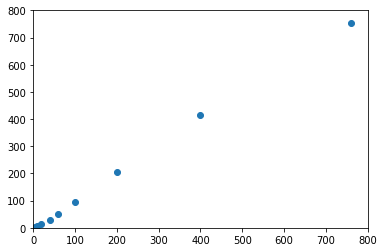

In [ ]:
plt.scatter(P,Pcalc)
plt.xlim([0,800])
plt.ylim([0,800])

In [ ]:
pd.DataFrame({'Ptrue':P,'Pcalc':Pcalc})

,Ptrue,Pcalc
0,1,0.182929
1,5,2.358739
2,10,5.815744
3,20,13.406448
4,40,29.902225
5,60,50.581554
6,100,94.342295
7,200,204.406331
8,400,413.824789
9,760,753.107985
